# Diwali Sales Data Analysis :
## 📊 Project Overview

Objective: Analyze Diwali sales data to understand customer behavior, product trends, and regional performance.

Goal: Provide actionable insights for optimizing marketing, sales, and inventory during festive seasons.

 Data Collection & Loading :

 Importing essential libraries


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns   

In [2]:
# Load Dataset
df = pd.read_csv('Diwali Sales Data.csv',encoding="ISO-8859-1")

Initial Data Exploration :

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [5]:
df.shape

(11251, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [8]:
df.describe(include='object')

,Cust_name,Product_ID,Gender,Age Group,State,Zone,Occupation,Product_Category
count,11251,11251,11251,11251,11251,11251,11251,11251
unique,1250,2351,2,7,16,5,15,18
top,Vishakha,P00265242,F,26-35,Uttar Pradesh,Central,IT Sector,Clothing & Apparel
freq,42,53,7842,4543,1946,4296,1588,2655


In [9]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print("="*50)

Cust_name
['Sanskriti' 'Kartik' 'Bindu' ... 'Chris' 'Madan Mohan' 'Nicole']
Product_ID
['P00125942' 'P00110942' 'P00118542' ... 'P00307142' 'P00044742'
 'P00296942']
Gender
['F' 'M']
Age Group
['26-35' '0-17' '18-25' '55+' '46-50' '51-55' '36-45']
State
['Maharashtra' 'Andhra\xa0Pradesh' 'Uttar Pradesh' 'Karnataka' 'Gujarat'
 'Himachal Pradesh' 'Delhi' 'Madhya Pradesh' 'Jharkhand' 'Kerala'
 'Haryana' 'Bihar' 'Rajasthan' 'Uttarakhand' 'Telangana' 'Punjab']
Zone
['Western' 'Southern' 'Central' 'Northern' 'Eastern']
Occupation
['Healthcare' 'Govt' 'Automobile' 'Construction' 'Food Processing'
 'Lawyer' 'IT Sector' 'Media' 'Banking' 'Retail' 'Hospitality' 'Aviation'
 'Agriculture' 'Textile' 'Chemical']
Product_Category
['Auto' 'Hand & Power Tools' 'Stationery' 'Tupperware' 'Footwear & Shoes'
 'Furniture' 'Food' 'Games & Toys' 'Sports Products' 'Books'
 'Electronics & Gadgets' 'Decor' 'Clothing & Apparel' 'Beauty'
 'Household items' 'Pet Care' 'Veterinary' 'Office']


Data Cleaning :

In [10]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [11]:
df=df.drop_duplicates()  #remove duplicate form data 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11243 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11243 non-null  int64  
 1   Cust_name         11243 non-null  object 
 2   Product_ID        11243 non-null  object 
 3   Gender            11243 non-null  object 
 4   Age Group         11243 non-null  object 
 5   Age               11243 non-null  int64  
 6   Marital_Status    11243 non-null  int64  
 7   State             11243 non-null  object 
 8   Zone              11243 non-null  object 
 9   Occupation        11243 non-null  object 
 10  Product_Category  11243 non-null  object 
 11  Orders            11243 non-null  int64  
 12  Amount            11231 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [13]:
df.dropna(inplace=True)

In [14]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [15]:
df['Amount'] = df['Amount'].astype('int')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11231 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11231 non-null  int64 
 1   Cust_name         11231 non-null  object
 2   Product_ID        11231 non-null  object
 3   Gender            11231 non-null  object
 4   Age Group         11231 non-null  object
 5   Age               11231 non-null  int64 
 6   Marital_Status    11231 non-null  int64 
 7   State             11231 non-null  object
 8   Zone              11231 non-null  object
 9   Occupation        11231 non-null  object
 10  Product_Category  11231 non-null  object
 11  Orders            11231 non-null  int64 
 12  Amount            11231 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


In [17]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [18]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11231.000000,11231.000000,11231.000000
mean,35.411985,2.489093,9454.084676
std,12.756116,1.114880,5221.728074
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12677.500000
max,92.000000,4.000000,23952.000000


In [19]:
df['Gender'].value_counts(normalize=True)

Gender
F    0.696999
M    0.303001
Name: proportion, dtype: float64

In [20]:
df["Gender"]=df["Gender"].replace("F","Female")
df["Gender"]=df["Gender"].replace("M","Male")

In [21]:
df["Marital_Status"]=df["Marital_Status"].replace(0,"Unmarried")
df["Marital_Status"]=df["Marital_Status"].replace(1,"Married")

In [22]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,Male,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11231 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11231 non-null  int64 
 1   Cust_name         11231 non-null  object
 2   Product_ID        11231 non-null  object
 3   Gender            11231 non-null  object
 4   Age Group         11231 non-null  object
 5   Age               11231 non-null  int64 
 6   Marital_Status    11231 non-null  object
 7   State             11231 non-null  object
 8   Zone              11231 non-null  object
 9   Occupation        11231 non-null  object
 10  Product_Category  11231 non-null  object
 11  Orders            11231 non-null  int64 
 12  Amount            11231 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.2+ MB


Data Visualization &  Exploratory Data Analysis :

👥 Customer Analysis :

In [24]:
s=df.drop_duplicates(subset='User_ID')  #remove duplicate user id for unique customer

C:\Users\HP\AppData\Local\Temp\ipykernel_4056\1555368867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Gender', data=s, palette=sns.color_palette("hls", 8))
C:\Users\HP\AppData\Local\Temp\ipykernel_4056\1555368867.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.countplot(x='Gender', data=s, palette=sns.color_palette("hls", 8))


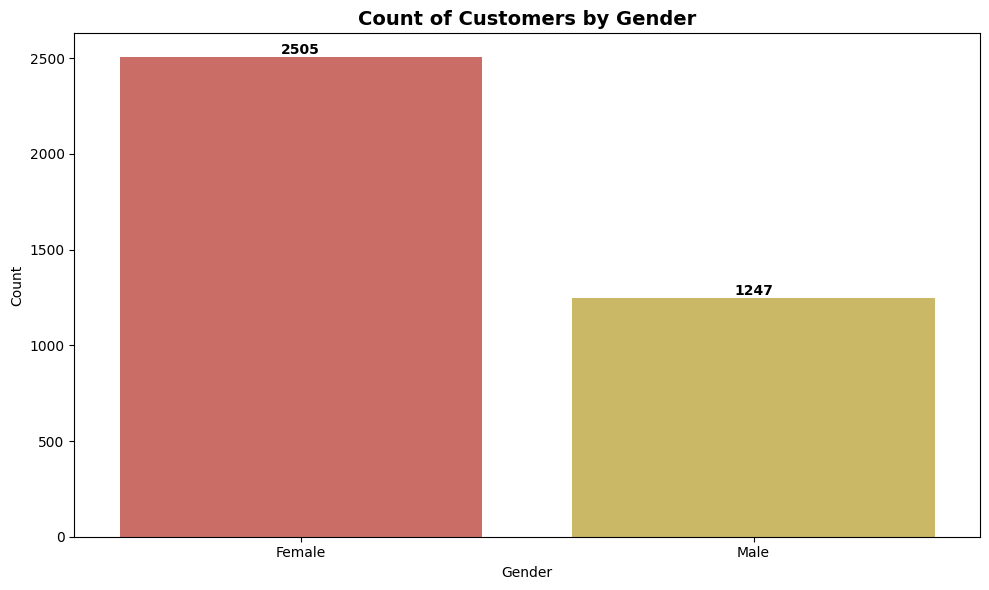

In [25]:
# Countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Gender', data=s, palette=sns.color_palette("hls", 8))

# Title
plt.title('Count of Customers by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add count labels on top of bars
for bar in ax.containers:
    ax.bar_label(bar, fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


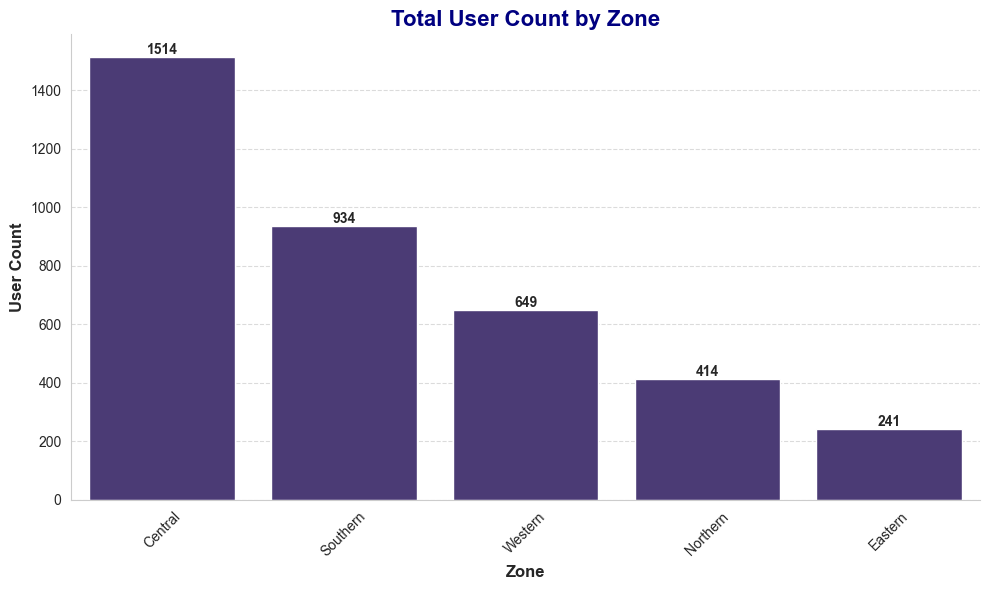

In [26]:
z = s.groupby('Zone', as_index=False)['User_ID'].count()
z = z.sort_values('User_ID', ascending=False) 
sns.set_style("whitegrid")
sns.set_palette("viridis")
plt.figure(figsize=(10, 6))  
bar_plot = sns.barplot(x="Zone", y="User_ID", data=z)
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{int(height)}', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title("Total User Count by Zone", fontsize=16, fontweight="bold", color='navy')
plt.xlabel("Zone", fontsize=12, fontweight='bold')
plt.ylabel("User Count", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()


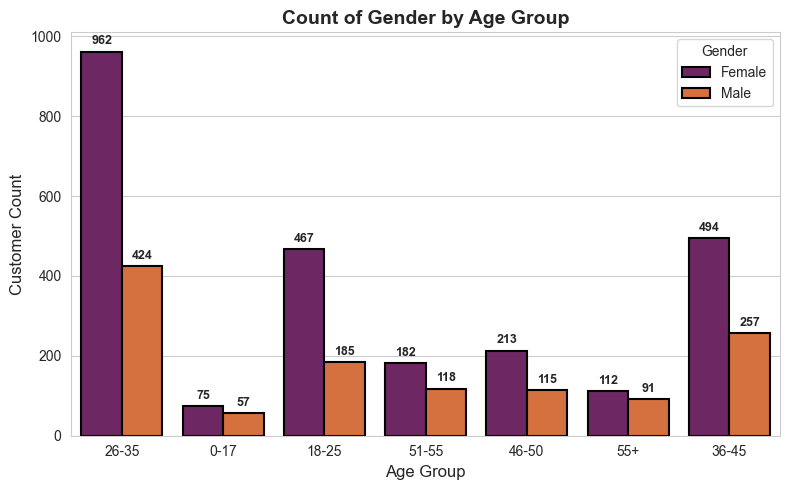

In [27]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=s,x="Age Group",hue="Gender",palette="inferno",edgecolor="black",linewidth=1.5)
# Add count labels
for bars in ax.containers:
    ax.bar_label(bars, padding=3, fontsize=9, fontweight='bold')
# Titles and labels
plt.title("Count of Gender by Age Group", fontsize=14, fontweight="bold")
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_4056\1207443250.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Occupation",data=s,palette="coolwarm",edgecolor="black",linewidth=1.5)


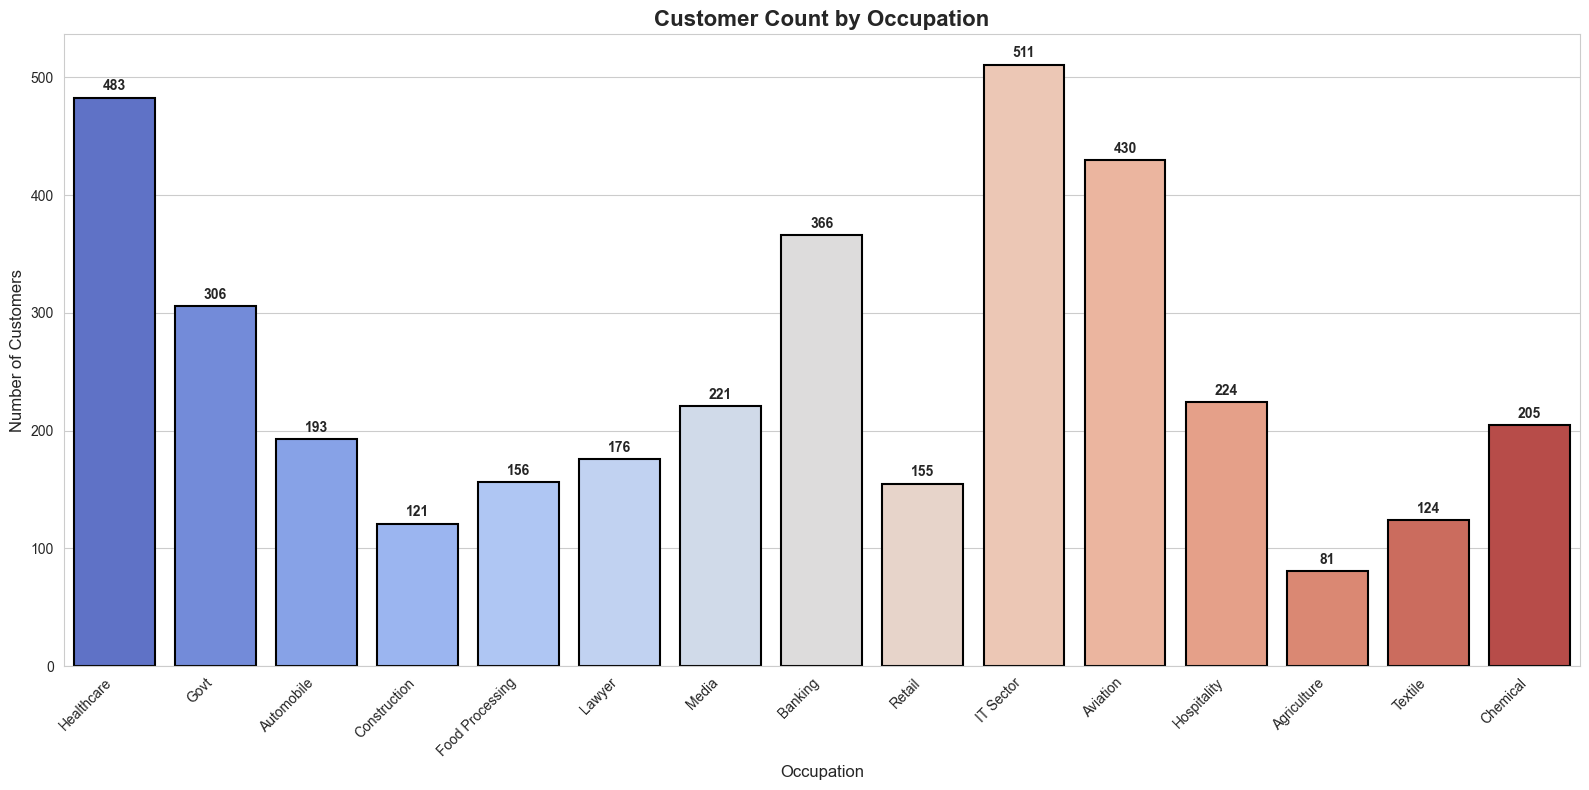

In [28]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(x="Occupation",data=s,palette="coolwarm",edgecolor="black",linewidth=1.5)
# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')
# Add value labels
for bars in ax.containers: 
    ax.bar_label(bars, padding=3, fontsize=10, fontweight='bold')
# Add labels and title
plt.title("Customer Count by Occupation", fontsize=16, fontweight="bold")
plt.xlabel("Occupation", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.tight_layout()
plt.show()


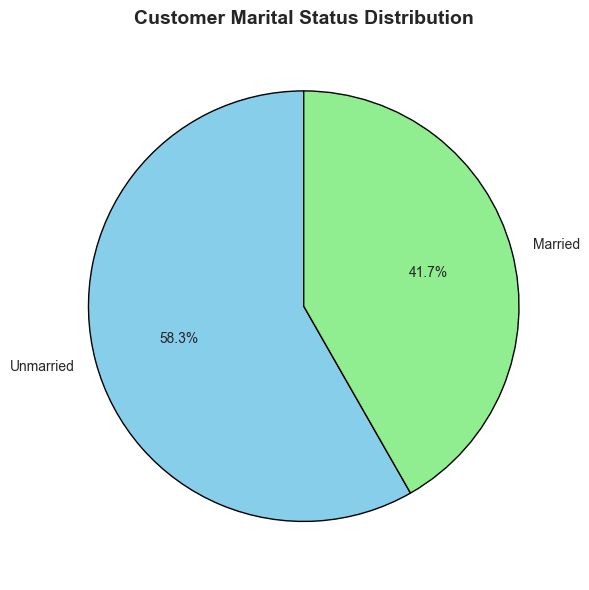

In [29]:
# Count values
m = s["Marital_Status"].value_counts()
# Create labels dynamically based on actual data
labels = ['Unmarried', 'Married'] if 0 in m.index else m.index.tolist()
# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(x=m,labels=labels,autopct='%1.1f%%',startangle=90,colors=['skyblue', 'lightgreen'],wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Customer Marital Status Distribution', fontsize=14, fontweight='bold')
plt.axis('equal') 
plt.tight_layout()
plt.show()


🛒 Orders Patterns :

In [30]:
# filtered_df = df[df['User_ID'] == 1001680]
# filtered_df

C:\Users\HP\AppData\Local\Temp\ipykernel_4056\74008897.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=totale, x='Gender', y='Orders', palette='Set2')


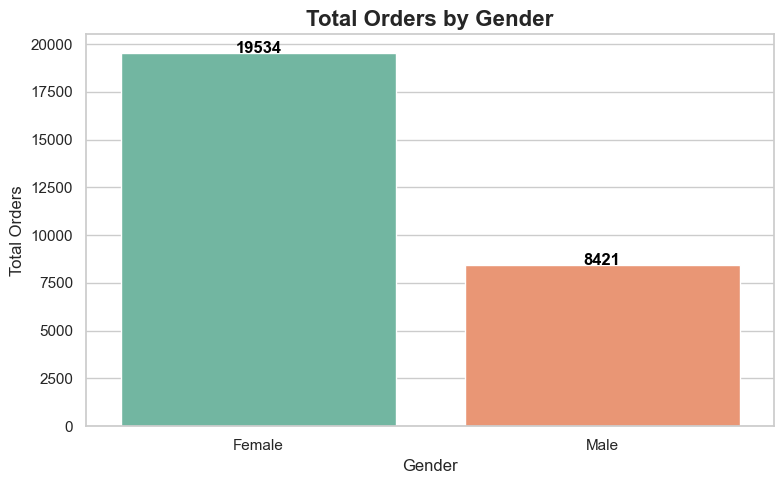

In [31]:
totale = df.groupby("Gender").agg({"Orders": "sum"}).reset_index()
# Set the style
sns.set(style="whitegrid")
# Create the barplot
plt.figure(figsize=(8, 5))
bar = sns.barplot(data=totale, x='Gender', y='Orders', palette='Set2')
# Add values on top of bars
for index, row in totale.iterrows():
    bar.text(index, row.Orders + 0.5, round(row.Orders), color='black', ha="center", fontsize=12, fontweight='bold')
# Add titles and labels
plt.title("Total Orders by Gender", fontsize=16, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_4056\2513238892.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=totale, x='State', y='Orders', palette='Set2')


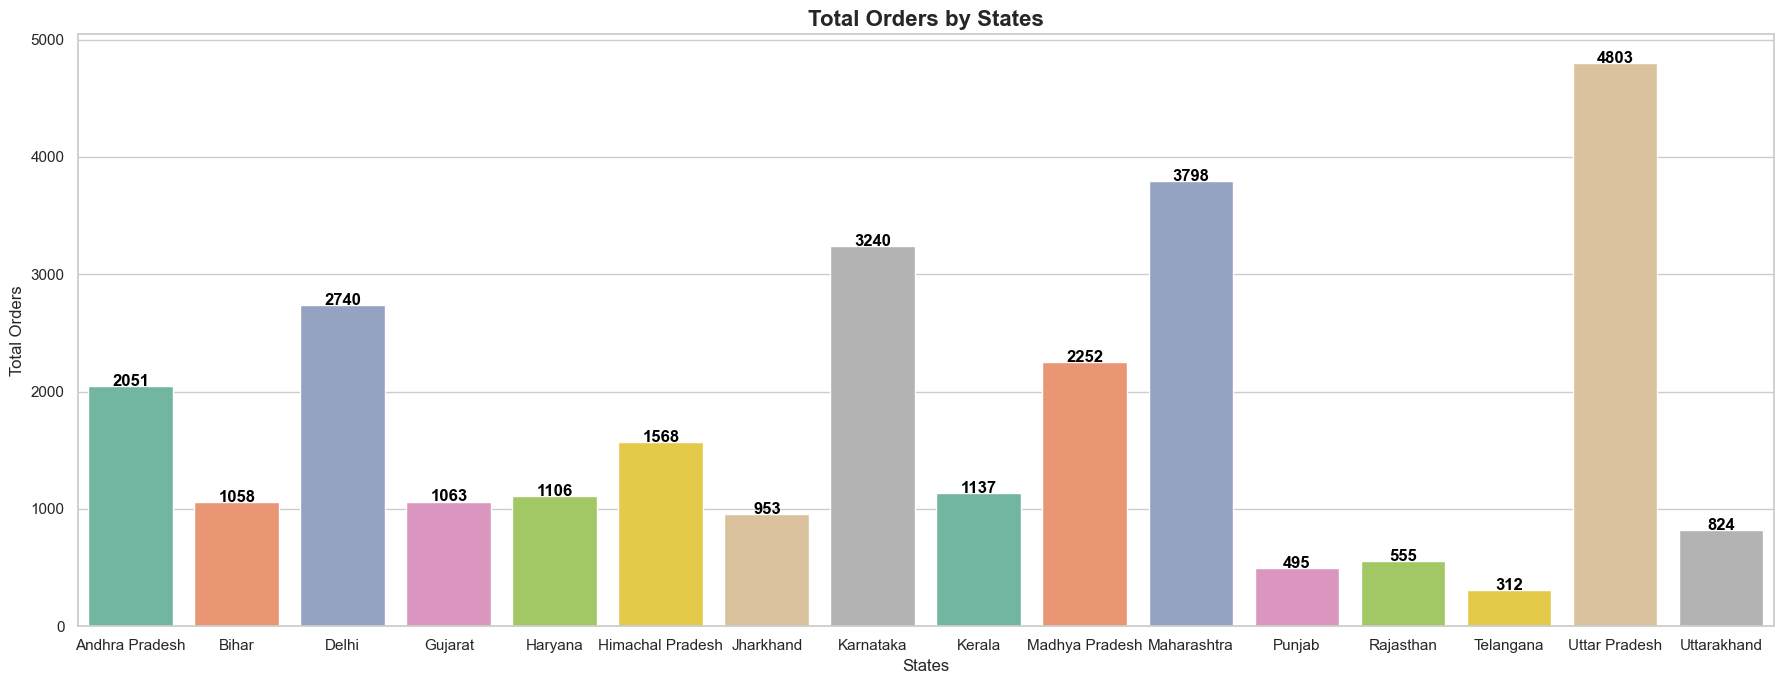

In [32]:
totale = df.groupby("State").agg({"Orders": "sum"}).reset_index()
# Set the style
sns.set(style="whitegrid")
# Create the barplot
plt.figure(figsize=(18, 7))
bar = sns.barplot(data=totale, x='State', y='Orders', palette='Set2')
# Add values on top of bars
for index, row in totale.iterrows():
    bar.text(index, row.Orders + 0.5, round(row.Orders), color='black', ha="center", fontsize=12, fontweight='bold')
# Add titles and labels
plt.title("Total Orders by States", fontsize=16, fontweight='bold')
plt.xlabel("States", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.tight_layout()
plt.show()


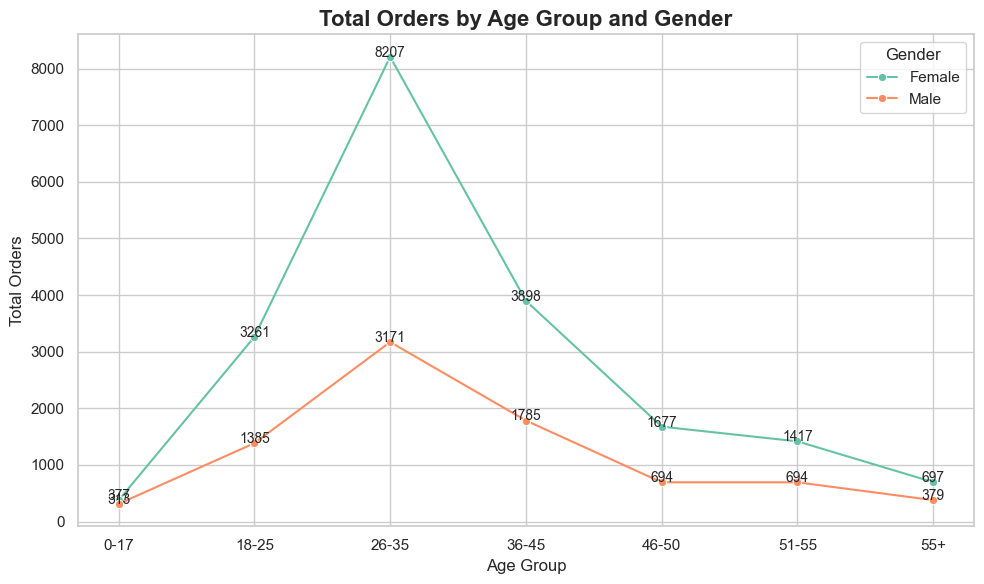

In [33]:
totale = df.groupby(["Age Group", "Gender"]).agg({"Orders": "sum"}).reset_index()
# Set style
sns.set(style="whitegrid")
# Create the plot
plt.figure(figsize=(10,6))
line = sns.lineplot(data=totale,x='Age Group',y='Orders',hue='Gender',marker='o',palette='Set2')
# Add point labels
for i in range(totale.shape[0]):
    x = totale['Age Group'][i]
    y = totale['Orders'][i]
    gender = totale['Gender'][i]
    # Find the x-position of the point on the plot
    plt.text(x, y + 1, f"{y}", ha='center', fontsize=10)
# Title and labels
plt.title("Total Orders by Age Group and Gender", fontsize=16, fontweight='bold')
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_4056\3391047402.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x='Orders',y='Product_Category',data=order_by_cat,palette='cubehelix')


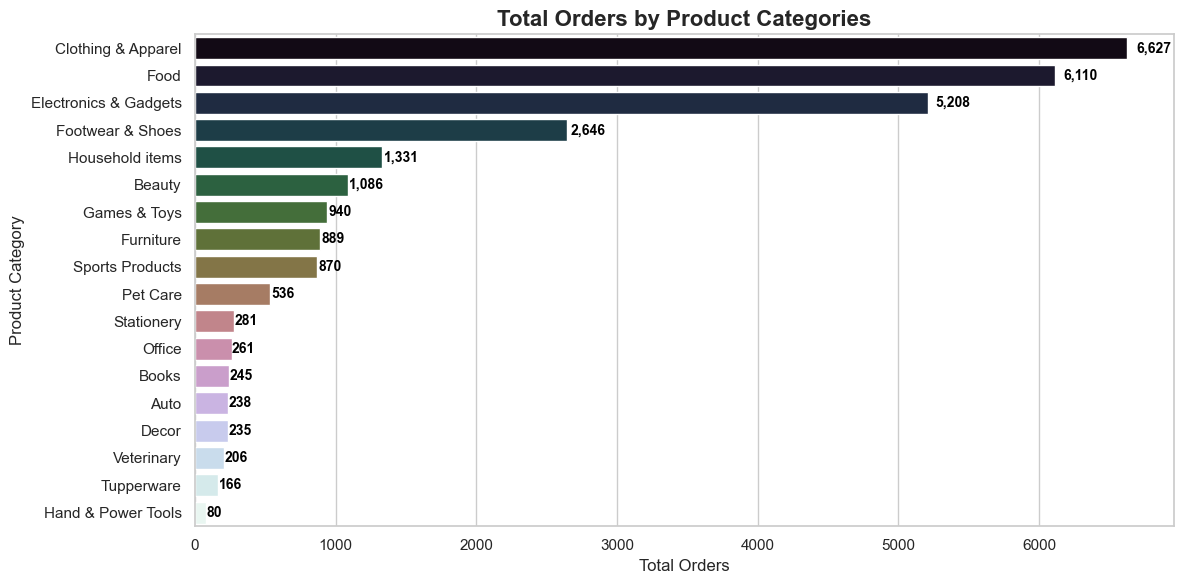

In [34]:
# Group and sort
order_by_cat = df.groupby('Product_Category')['Orders'].sum().reset_index().sort_values(by='Orders', ascending=False)
# Set style
sns.set(style="whitegrid")
# Plot
plt.figure(figsize=(12, 6))
bar = sns.barplot(x='Orders',y='Product_Category',data=order_by_cat,palette='cubehelix')
# Add value labels to bars (cleanly aligned)
for i in range(len(order_by_cat)):
    order_value = order_by_cat['Orders'].iloc[i]
    category = order_by_cat['Product_Category'].iloc[i]
    plt.text(order_value + order_value * 0.01,i,f'{order_value:,}',va='center',fontsize=10,fontweight='bold',color='black')
# Labels and title
plt.title('Total Orders by Product Categories', fontsize=16, fontweight='bold')
plt.xlabel('Total Orders', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
# Layout and show
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_4056\1781814159.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x='User_ID', y='Orders', data=top_users, palette='magma')


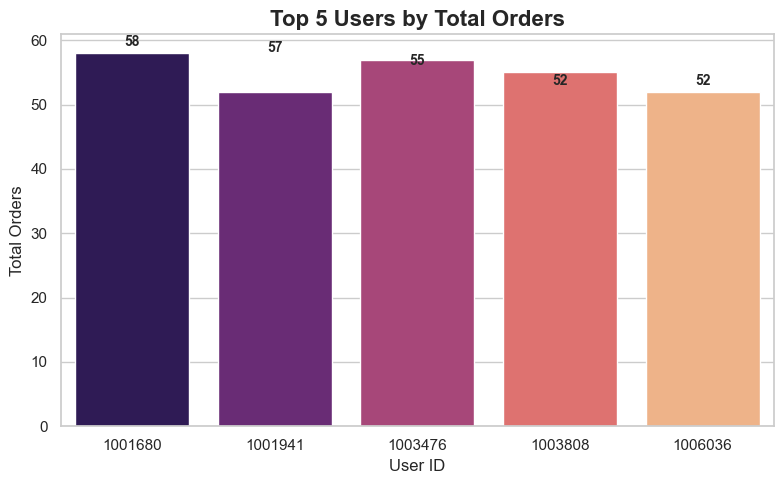

In [35]:
top_users = df.groupby("User_ID").agg({"Orders": "sum"}).nlargest(5, "Orders").reset_index()
# Plot
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
bar = sns.barplot(x='User_ID', y='Orders', data=top_users, palette='magma')
# Add value labels on top of each bar
for index, row in top_users.iterrows():
    plt.text(index, row.Orders + row.Orders * 0.02, f"{row.Orders}", ha='center', fontsize=10, fontweight='bold')
# Title and labels
plt.title("Top 5 Users by Total Orders", fontsize=16, fontweight='bold')
plt.xlabel("User ID", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)                                                                                                             
plt.tight_layout()
plt.show()


📈 Sales  Analysis :

In [36]:
# filtered_df = df[df['User_ID'] == 1001941]
# filtered_df

C:\Users\HP\AppData\Local\Temp\ipykernel_4056\2909683877.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=top_users, y='Cust_name', x='Amount', palette='plasma')


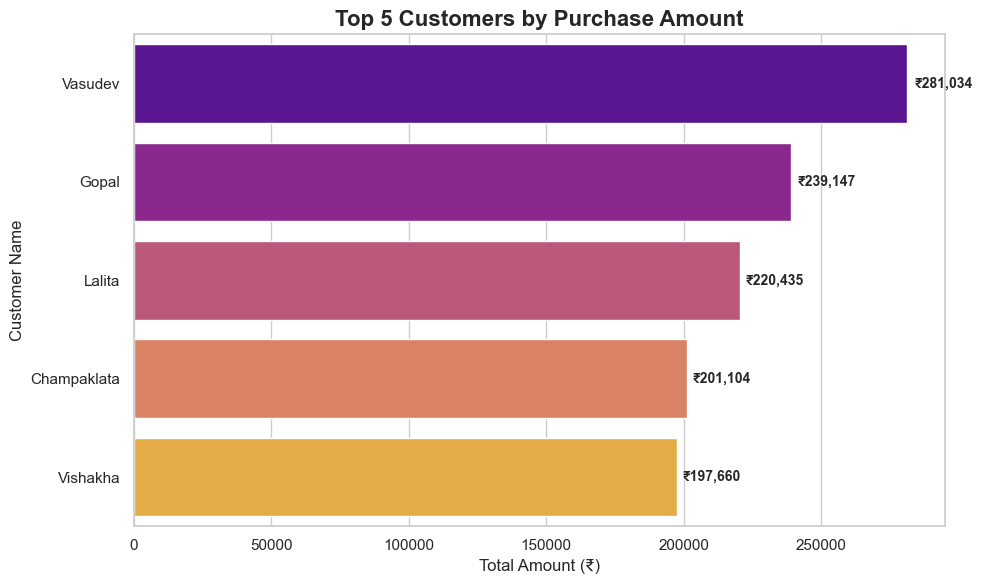

In [37]:
# Get top 5 user IDs by amount
top_users = df.groupby("User_ID")["Amount"].sum().reset_index().sort_values(by='Amount', ascending=False).head(5)
# Merge with original to get names or emails (dropping duplicates)
user_details = df[['User_ID', 'Cust_name']].drop_duplicates()
top_users = top_users.merge(user_details, on='User_ID', how='left')
# Use 'Name' 
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=top_users, y='Cust_name', x='Amount', palette='plasma')
# Add value labels
for index, row in top_users.iterrows():
    plt.text(row.Amount + row.Amount * 0.01, index, f"₹{row.Amount:,.0f}", va='center', fontsize=10, fontweight='bold')
plt.title("Top 5 Customers by Purchase Amount", fontsize=16, fontweight='bold')
plt.xlabel("Total Amount (₹)")
plt.ylabel("Customer Name")
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_4056\43947838.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar = sns.barplot(x="Marital_Status",y="Amount",data=Marital,hue="Gender",palette="magma",edgecolor="black",linewidth=1.5,ci=None)


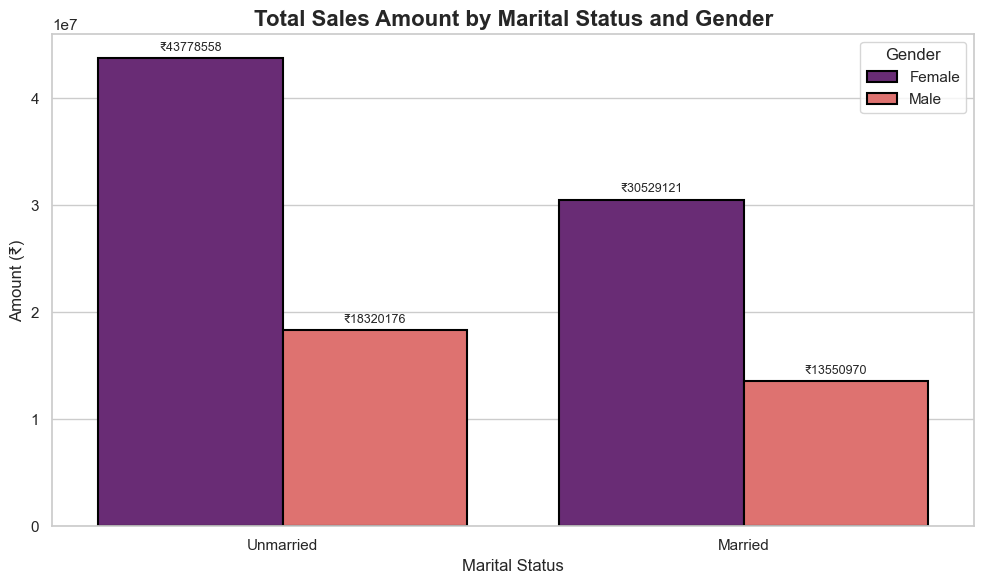

In [38]:
# Grouping and sorting
Marital = (
    df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False))
# Plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
bar = sns.barplot(x="Marital_Status",y="Amount",data=Marital,hue="Gender",palette="magma",edgecolor="black",linewidth=1.5,ci=None)
# Add value labels on each bar
for container in bar.containers:
    bar.bar_label(container, fmt='₹%.0f', label_type='edge', fontsize=9, padding=3)
# Titles and labels
plt.title("Total Sales Amount by Marital Status and Gender", fontsize=16, fontweight="bold")
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Amount (₹)", fontsize=12)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


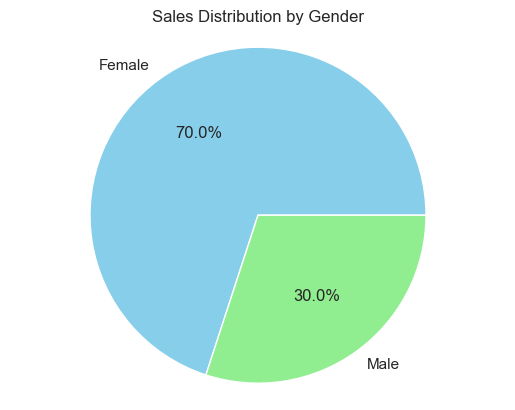

In [39]:
#sub-chart of Total Sales Amount by Marital Status and Gender
gender_pie = df.groupby('Gender')['Amount'].sum()
plt.pie(gender_pie, labels=gender_pie.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Sales Distribution by Gender')
plt.axis('equal')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_4056\3446687360.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x='Amount',y='Occupation',data=sales_by_occ,palette='coolwarm',edgecolor='black')


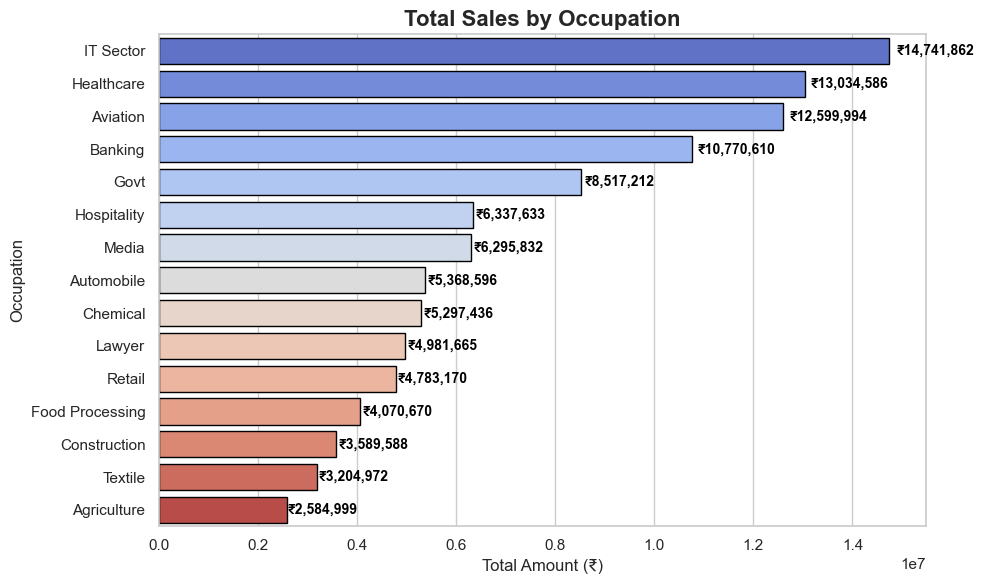

In [40]:
# Group and sort
sales_by_occ = (df.groupby('Occupation')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False))
# Plot setup
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
bar = sns.barplot(x='Amount',y='Occupation',data=sales_by_occ,palette='coolwarm',edgecolor='black')
# Add proper ₹ labels on each bar
for i in range(len(sales_by_occ)):
    amount = sales_by_occ['Amount'].iloc[i]
    occupation = sales_by_occ['Occupation'].iloc[i]
    plt.text(amount + amount * 0.01,i,f"₹{amount:,.0f}",va='center',fontsize=10,fontweight='bold',color='black')
# Titles and axes
plt.title('Total Sales by Occupation', fontsize=16, fontweight='bold')
plt.xlabel('Total Amount (₹)', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_4056\1806688508.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Amount',y='Occupation',data=grouped,palette='magma',edgecolor='black')


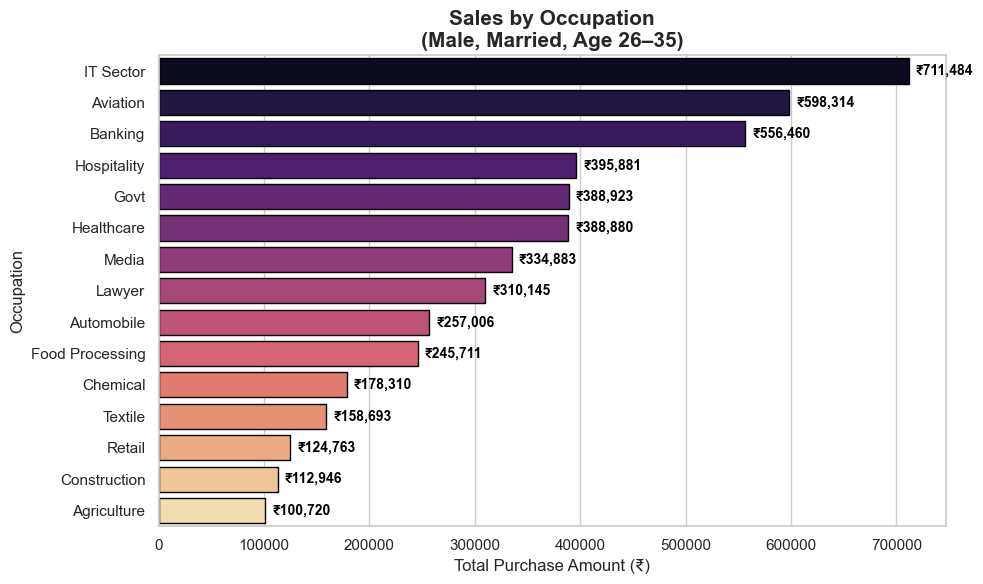

In [46]:
#sub-chart of Total Sales by Occupation
# Filter target group
target_group = df[(df['Gender'] == 'Male') & (df['Marital_Status'] == "Married") &(df['Age Group'] == '26-35')]
# Group by Occupation
grouped = (target_group.groupby('Occupation')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False))
# Plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x='Amount',y='Occupation',data=grouped,palette='magma',edgecolor='black')
# Add value labels with padding
for index, row in enumerate(grouped.itertuples()):
    ax.text(row.Amount + grouped['Amount'].max()*0.01, index, f"₹{row.Amount:,.0f}",
            va='center', fontsize=10, fontweight='bold', color='black')
# Titles and formatting
plt.title('Sales by Occupation\n(Male, Married, Age 26–35)', fontsize=15, fontweight='bold')
plt.xlabel('Total Purchase Amount (₹)', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.tight_layout()
plt.show()

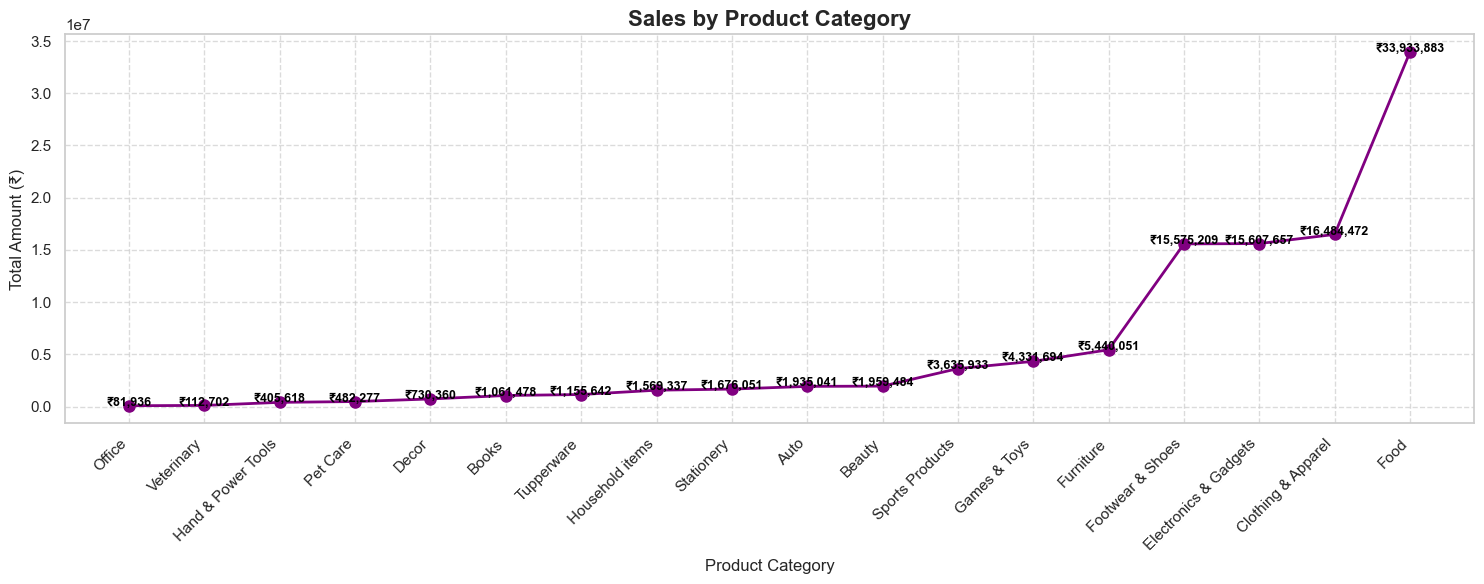

In [50]:
# Prepare the data
cat_sales = (df.groupby('Product_Category')['Amount'].sum().reset_index().sort_values(by='Amount'))
# Plot
plt.figure(figsize=(15, 6))
plt.plot(cat_sales['Product_Category'],cat_sales['Amount'],marker='o',color='purple',linewidth=2, linestyle='-',markersize=8)
# Add value labels on points
for i, row in cat_sales.iterrows():
    plt.text(row['Product_Category'], row['Amount'] + 500,f"₹{row['Amount']:,.0f}",ha='center',fontsize=9,fontweight='bold',color='black')
# Axis, grid, and title
plt.xticks(rotation=45, ha='right')
plt.title('Sales by Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Amount (₹)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_4056\2549519728.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x='Product_Category',y='Amount',data=combo_summary,palette='Set2',edgecolor='black')


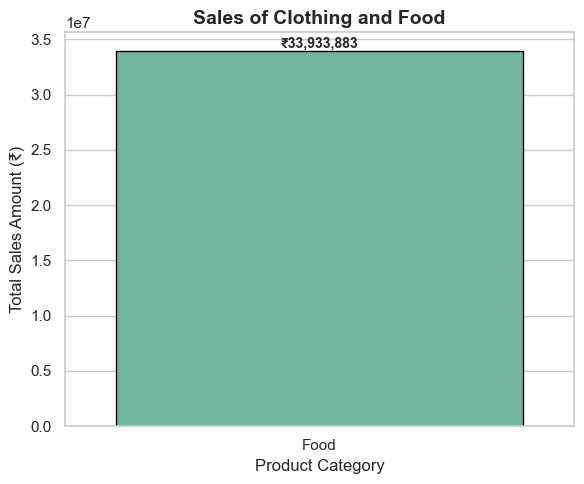

In [43]:
# Filter only Clothing and Food
combo_data = df[df['Product_Category'].isin(['Clothing', 'Food'])]
# Group and summarize
combo_summary = combo_data.groupby('Product_Category')['Amount'].sum().reset_index()
# Plotting
plt.figure(figsize=(6, 5))
sns.set(style="whitegrid")
bar = sns.barplot(x='Product_Category',y='Amount',data=combo_summary,palette='Set2',edgecolor='black')
# Add ₹ value labels on top of bars
for i, row in combo_summary.iterrows():
    plt.text(i, row['Amount'] + 1000, f"₹{row['Amount']:,.0f}", 
             ha='center', va='bottom', fontsize=10, fontweight='bold')
# Chart title and labels
plt.title('Sales of Clothing and Food', fontsize=14, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales Amount (₹)', fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_4056\1805405472.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x='Age Group',y='Amount',data=Amount_by_Age,palette='Set2',edgecolor='black')


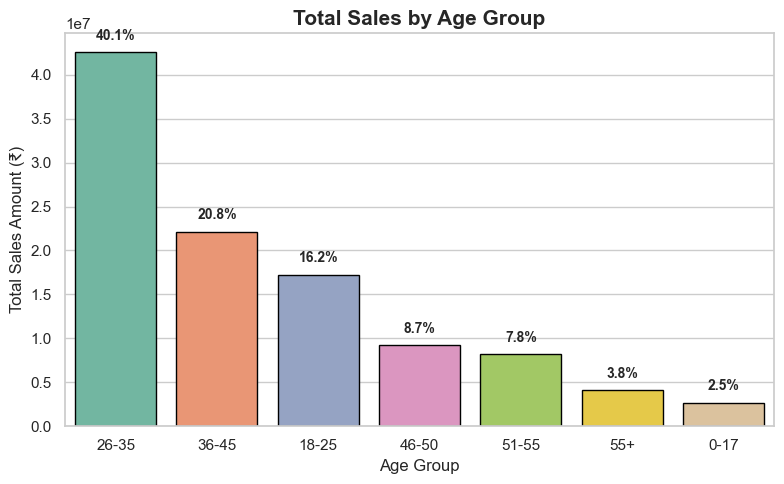

In [44]:
# Group data
Amount_by_Age = (df.groupby('Age Group', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False))
# Total for percentage calculation
total = Amount_by_Age['Amount'].sum()
# Plot
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
bar = sns.barplot(x='Age Group',y='Amount',data=Amount_by_Age,palette='Set2',edgecolor='black')
# Add percentage labels above bars
for i, v in enumerate(Amount_by_Age['Amount']):
    percentage = v / total * 100
    plt.text(i, v + total * 0.01, f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')
# Title and labels
plt.title('Total Sales by Age Group', fontsize=15, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Sales Amount (₹)', fontsize=12)
plt.tight_layout()
plt.show()


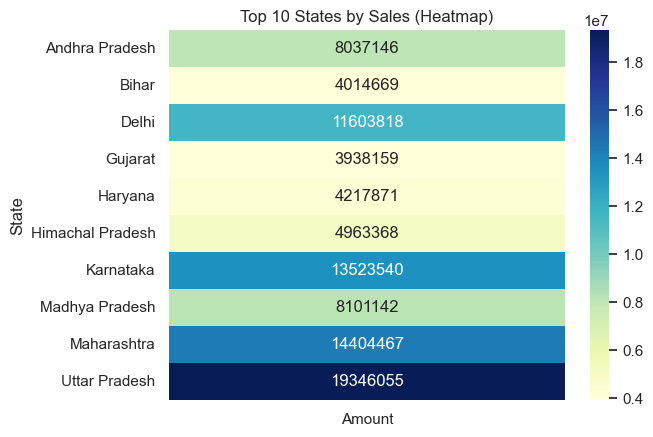

In [45]:
# Simplified Heatmap of Top 10 States
top_states = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()
top_states_pivot = top_states.pivot_table(index='State', values='Amount')
sns.heatmap(top_states_pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Top 10 States by Sales (Heatmap)')
plt.show()


# 1-from above grapha we can see that most the buyers are female
# 2- from above graph we can see that most of thr order total sales from Uttar pardesh ,, Maharashtra ,, Karnataka ,, Delhi
# 3- from above graph we can see that most of the buyer are not married woman and they have high purching power
# 4 - from above graph we can see that most of the buyers are working IT , Health care and aviatio 
# 5- from above graph we can see that most of the sold product are from food ,, clothing and electronic category

<h2 style="background: linear-gradient(135deg, #ff7e5f, #feb47b); color:white; padding:15px; text-align:center; border-radius:15px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.4);">
   Conlusion
</h2>

<h2 style="background:gold; color:black; padding:15px; text-align:center; border-radius:15px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.4);">
   Unmarried women age group btw 26-35 years from UP, Maharashtra, and Karnataka working in IT, Healthcare, and Aviation sector are more likely to buy products from Food, Clothing, and Electronics category.
</h2>
